In [ ]:
# Abdülhalim YAYDEMİR

Dosya bilgisi :

P5 pgm formatı
genişlik(width)= 482
yükseklik(height)= 571
maxval= 255


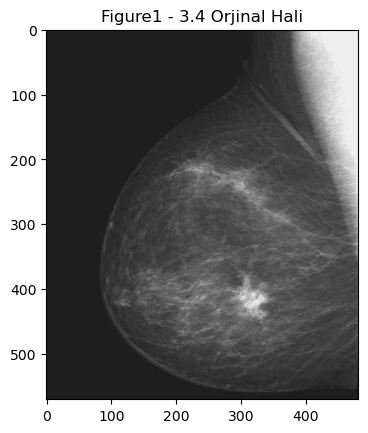

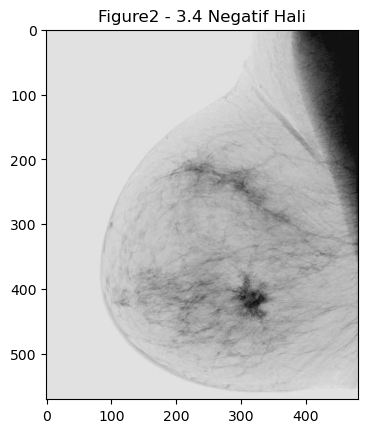

In [1]:
import matplotlib.pyplot as plt # görüntüyü bastırmak için gereklidir
import numpy as np # array işlemleri için gerekli

#################functions#################
def negative(a):
    a=256-1-a  
    return a
###########################################



#Fig0304(a)(breast_digital_Xray).pgm dosyası 'rb' modunda açılarak okundu.
with open("Fig0304(a)(breast_digital_Xray).pgm", "rb") as fileObject:
    fileContent=fileObject.read()
    
    
    
    
    #dosyanın ilk iki karakterine bakılarak P5 formatı olup olmadığına bakıldı
    print('Dosya bilgisi :\n')
    i=0
    while fileContent[i]!=10:
        if i==0:
            if (fileContent[0]==80) & (fileContent[1]==53):
                print('P5 pgm formatı')  
            else:
                print('P5 pgm formatı değil')
        i=i+1

    
    
    # '#' ile başlayan satır geçildi.
    i=i+1
    while fileContent[i]!=10:
        if fileContent[i]==35:
            while fileContent[i]!=10:
                i=i+1
    
    
     
    # genişlik yükseklik bilgileri yazdırıldı
    i=i+1
    while fileContent[i]!=10:
        if fileContent[i]==35:
            while fileContent[i]!=10:
                i=i+1  
        else:
            string=[]
            while fileContent[i]!=32:
                width=chr(fileContent[i])
                string.append(width)       
                i=i+1
                
            string=''.join(string)
            width=int(string)
            print("genişlik(width)=",width)
            i=i+1
            string=[]
            
            while fileContent[i]!=10:
                height=chr(fileContent[i])
                string.append(height)
                i=i+1
                
            string=''.join(string)
            height=int(string)
            print("yükseklik(height)=",height)
                   
             
                
            
    # maxval değeri yazdırıldı
    i=i+1
    string=[]
    while fileContent[i]!=10:
        maxval=chr(fileContent[i])
        string.append(maxval)       
        i=i+1
    
    string=''.join(string)
    maxval=int(string)
    print("maxval=",maxval)
    
    
    
    # orjinal görüntüyü ekrana yazdırmak için oluşturuldu
    fileContent2=bytearray(fileContent)
    
    
    
    # piksellerin negatifi alındı
    i=i+1
    j=1
    b=i
    fileContent=bytearray(fileContent)
    while 1:          
        fileContent[i]=negative(fileContent[i])
        i=i+1
        j=j+1
        if j==height*width+1:
            break
         
        
        
    # negatifi alınmış pikseller imshow() komutunda kullanılmak üzere arraya geçirildi
    i=b
    f=np.arange(height*width).reshape((height,width))      
    for m in range(height):
        for n in range(width):
            f[m][n]=fileContent[i]
            i=i+1
            
            
            
            
    # orjinal pikseller imshow() komutunda kullanılmak üzere arraya geçirildi
    i=b
    f2=np.arange(height*width).reshape((height,width))      
    for m in range(height):
        for n in range(width):
            f2[m][n]=fileContent2[i]
            i=i+1
            
            
            
    # dosyaya yazdırılmak için byte tipine dönüştürüldü
    fileContent=bytes(fileContent)
    
    
    
    
    
# dosyanın yeni hali 3.4(negatif).pgm isimli dosyaya yazdırıldı
with open("3.4(negatif).pgm", "wb") as fileObject:
    fileObject.write(fileContent)

    
    
# orjinal görüntü ekrana yazdırıldı
plt.figure()
plt.title("Figure1 - 3.4 Orjinal Hali")
plt.imshow(f2,cmap='gray',vmin=0, vmax=255)  
    
    
# işlenmiş görüntü ekrana yazdırıldı
plt.figure()
plt.title("Figure2 - 3.4 Negatif Hali")
plt.imshow(f,cmap='gray',vmin=0, vmax=255)

# Sonuç


In [ ]:
# Bu bölümde görüntünün negatifini alma işlemi gerçekleştirildi
# Görüntüdeki pikseller 255'den çıkartılarak 255'e tamlayanı hesaplandı
# Orjinal görüntü ile negatif görüntü arasında siyahların beyaz, beyazların siyah olması durumu gözlendi